In [30]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()


from sklearn import linear_model

%matplotlib inline
%precision 3

'%.3f'

In [31]:
pwd

'/content/CH3'

In [32]:
mkdir CH3

In [33]:
cd ./CH3

/content/CH3/CH3


In [34]:
# p.75
import requests, zipfile
from io import StringIO
import io

In [35]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [36]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [37]:
# p.76-77

student_data_math = pd.read_csv('student-mat.csv', sep = ';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [38]:
# p.78
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [39]:
cat student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [40]:
# p.82

student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

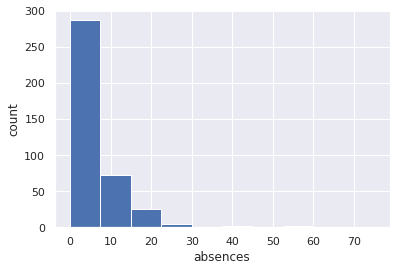

In [41]:
# p.83

plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [53]:
# p.83-84

print("student_data_math['absences']\n")
print('mean                 ', student_data_math['absences'].mean())
print('median               ', student_data_math['absences'].median())
print('mode                 ', student_data_math['absences'].mode())
print('variance             ', student_data_math['absences'].var(ddof=0))
print('standard deviation 1 ', student_data_math['absences'].std(ddof=0))
print('standard deviation 2 ', np.sqrt(student_data_math['absences'].var(ddof=1)))
print('')

# cf.
"""ddof : int, default 1
    Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
    where N represents the number of elements."""
print()

student_data_math['absences']

mean                  5.708860759493671
median                4.0
mode                  0    0
dtype: int64
variance              63.887389841371515
standard deviation 1  7.992958766400057
standard deviation 2  8.003095687108177




In [60]:
# p.85-86

print(".describe()")
print(student_data_math['absences'].describe())
print("\n")

print("interquartile range (IQR)")
print(student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4])

.describe()
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


interquartile range (IQR)
8.0


In [69]:
# p.86

student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


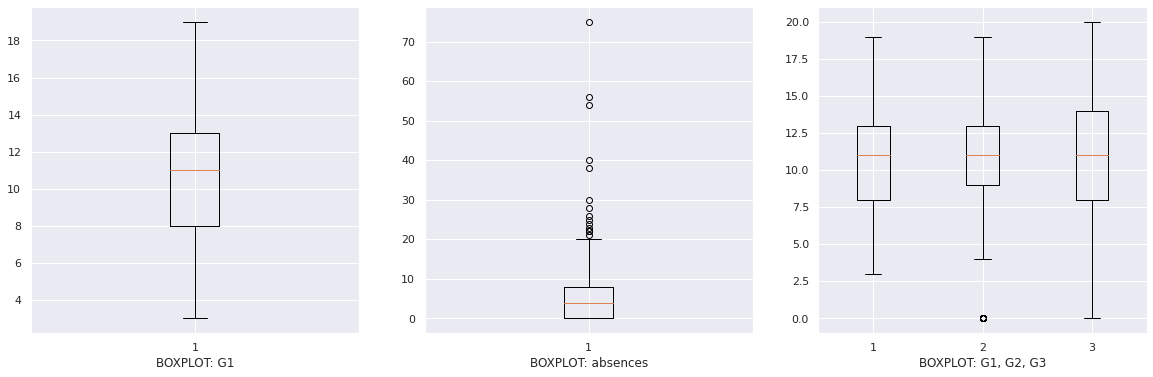

In [86]:
# p.87

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.boxplot(student_data_math['G1'])
plt.xlabel('BOXPLOT: G1')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.boxplot(student_data_math['absences'])
plt.xlabel('BOXPLOT: absences')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.xlabel('BOXPLOT: G1, G2, G3')
plt.grid(True)

plt.show()

# 이상값은 엄밀한 정의가 없고 각 분야의 관례를 따릅니다. 위의 그래프에서는 이상값을 생략했지만 생략되지 않을 때도 있습니다.